<h1>Data Processing Project:</h1>
Elcentro earthquake data was available in a data file with a delimiter(Characters separating data values in a row )' /t '.
The objective was to plot seismic response spectrum from the earthquake data. 

In [1]:
'''Importing libraries, numpy for numerical calculations and arrays, 
matplotlib for plotting graphs,and pandas is for creating data frame'''

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
'''Reading data from file and loading it into a data frame'''

data_Initial= pd.read_csv('elcentro.dat', sep = ' \t ',engine='python')
#Engine is changed to python because C engine does not work on non standard delimiters

In [3]:
'''Printing data frame's initial file value to inspect that loadng was proper or not.Also checking the size of data.'''

print(data_Initial.head())
print(np.shape(data_Initial))

   Time  Acceleration
0  0.00       0.00630
1  0.02       0.00364
2  0.04       0.00099
3  0.06       0.00428
4  0.08       0.00758
(1560, 2)


In [4]:
'''Storing time and acceleration values in arrays for processing '''
time=np.array(data_Initial.iloc[::,0])
accl=np.array(data_Initial.iloc[::,1])

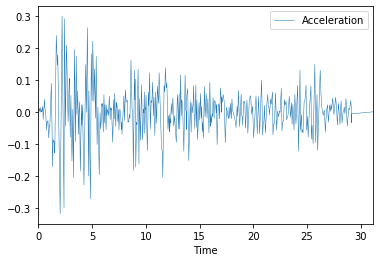

In [5]:
'''Plotting value  from data frame'''

data_Initial.plot('Time','Acceleration',linewidth='0.5')

In [6]:
'''Calculation of velocity in Discrete acceleration time data can be done to great accuracy by simple Reimann sum '''

vel=[]
k=0
vel.append(0)#initial velocity =0
for i in range(1559):
    k+=(accl[i]+accl[i+1])*0.01#integrating via simple Reimann sum logic.
    vel.append(k)
vel=np.array(vel)

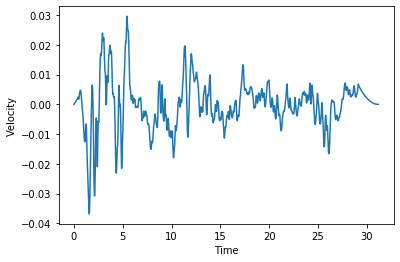

In [7]:
'''Plotting velocity vs time graph '''

plt.plot(time,vel)
plt.xlabel('Time')
plt.ylabel('Velocity');


In [8]:
'''Calculation of dispacement in Discrete velocity time data can be done to great accuracy by simple Reimann sum '''

displacement=[]
k=0
displacement.append(0)#integration of velocity to find displacement
for i in range(1559):
    k+=(vel[i]+vel[i+1])*0.01
    displacement.append(k)
displacement=np.array(displacement)

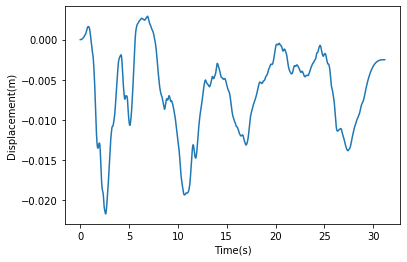

In [9]:
'''Plotting displacement time graph'''

plt.plot(time,displacement)
plt.xlabel('Time(s)')
plt.ylabel('Displacement(m)');

In [10]:
''' Taking fourier transform of data to convert into frequency doamin'''

fouriert=np.fft.fft(accl)#writing acceleration in frequency space
freq=np.fft.fftfreq(1560,0.02)#creating array for frequencies

C:\Users\anmol harshana\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


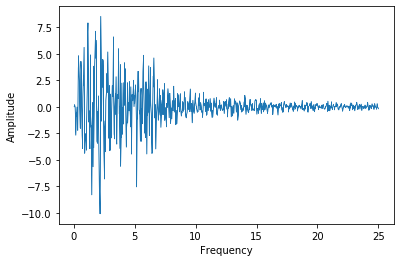

In [11]:
'''plotting frequencies with their magnitude f(x)=$sum$A sin(wt) plot of A vs w'''

plt.plot(abs(freq),fouriert,linewidth=0.5)
plt.xlabel('Frequency')
plt.ylabel('Amplitude');

In [12]:
'''Importing pyrotd library for calculating acceleration spectrum'''

from pyrotd import calc_spec_accels

In [13]:
'''Setting values for damping value and creating an array for natural frequency data'''

osc_damping=0.05#default value for damping
osc_freqs=np.logspace(-1,1,1560)#creating an array for natural frequency data
#creating array of 1560 values from 10^-1 to 10^1.Size was observed above.
#1560 was chosen as it was no. of data points available in given dataset.This number can be changed with no effect on result.
#checked for 1000 to 3000.
'''the reason is that the entire input acceleration is applied to a single degree freedom system of a given natural frequency
and the peak acceleration of the system is noted.'''

'the reason is that the entire input acceleration is applied to a single degree freedom system of a given natural frequency\nand the peak acceleration of the system is noted.'

In [14]:
'''The function calc_spec_accels returns a list in which 
each element is a list containing natural frequency in Hz and peak acceleration in G '''

spec_accels=calc_spec_accels(0.02,accl,osc_freqs,osc_damping)
spec_accels[0]

(0.1, 0.00942355)

In [15]:
'''storing data in arrays cause log scale couldn't be implemented in pandas plot
Switching from dataframe to arrays.'''

dataframe=pd.DataFrame(spec_accels)
N_Freq=dataframe.iloc[::,0]
Peak_acc=dataframe.iloc[::,1]

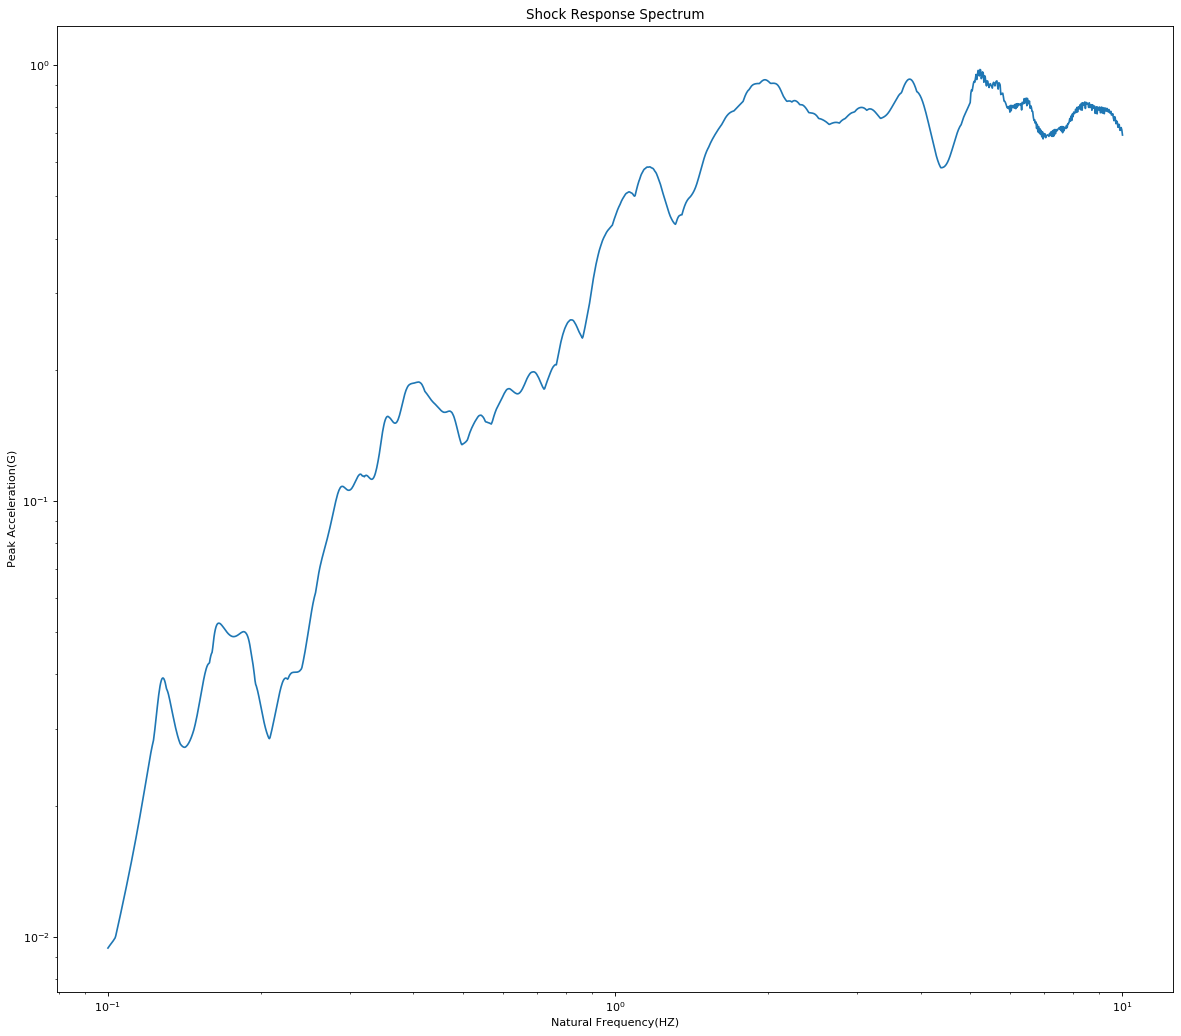

In [16]:
'''Plotting shock response spectrum-A plot of Peak acceleration vs natural frequency.'''

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')#to increase the size of image7
plt.plot(N_Freq,Peak_acc)
plt.title('Shock Response Spectrum')
plt.xscale('log')#setting plot scale to log scale 
plt.yscale('log')#setting plot scale to log scale 
plt.xlabel('Natural Frequency(HZ)')
plt.ylabel('Peak Acceleration(G)');